In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
def evaluate(d):
    mse_f = np.mean(d**2)
    mae_f = np.mean(abs(d))
    rmse_f = np.sqrt(mse_f)
    print("MAE:",mae_f)
    print("MSE:", mse_f)
    print("RMSE:", rmse_f)

In [4]:
# import data
data_set = pd.read_csv('airline_passengers.csv',infer_datetime_format=True,parse_dates=["Month"],index_col=["Month"])


<AxesSubplot:xlabel='Month'>

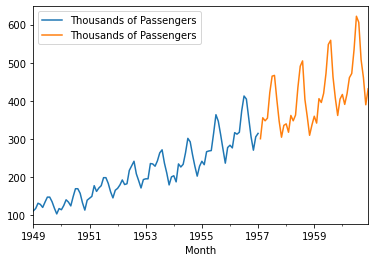

In [5]:
train, test = data_set[:'1957-01-01'].copy(), data_set['1957-01-02':].copy()
ax = train.plot()
test.plot(ax=ax)

### Naive

In [6]:
def naive(data):
    return data[-1]

In [8]:
naive_pred = naive(train['Thousands of Passengers'])
naive_pred

315

In [23]:
d = test['Thousands of Passengers'] - naive_pred
evaluate(d)

MAE: 101.80851063829788
MSE: 16066.489361702128
RMSE: 126.75365620644688


### Simple mean

In [9]:
def simple_mean(data):
    return data.mean()

In [11]:
sm_pred = simple_mean(train['Thousands of Passengers'])
sm_pred

214.75257731958763

In [24]:
d = test['Thousands of Passengers'] - sm_pred
evaluate(d)

MAE: 200.82189076551873
MSE: 46280.69754173799
RMSE: 215.12949017217045


### Last k mean

In [12]:
def lastk_mean(data, k):
    return data[-k:].mean()

In [14]:
lk_pred = lastk_mean(train['Thousands of Passengers'], k=10)
lk_pred

337.6

In [25]:
d = test['Thousands of Passengers'] - lk_pred
evaluate(d)

MAE: 83.02127659574472
MSE: 12031.283404255315
RMSE: 109.6872071130235


### visualizing the three predictions

In [26]:
test_with_pred = test
test_with_pred["naive_pred"] = naive_pred
test_with_pred["sm_pred"] = sm_pred
test_with_pred["lk_pred"] = lk_pred

<AxesSubplot:xlabel='Month'>

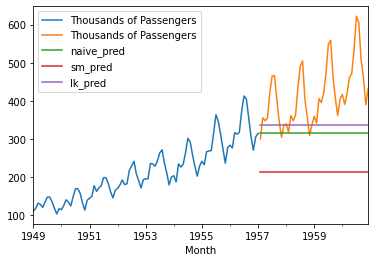

In [27]:
bx = train.plot()
test_with_pred.plot(ax=bx)